# Imports

In [1]:
import warnings

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Loading Data

In [2]:
!wget https://github.com/papir805/Stanford-ML-Class/blob/master/neural_networks/mnist_loader.py

--2024-01-15 23:39:17--  https://github.com/papir805/Stanford-ML-Class/blob/master/neural_networks/mnist_loader.py
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17353 (17K) [text/plain]
Saving to: ‘mnist_loader.py’

mnist_loader.py     100%[===================>]  16.95K  --.-KB/s    in 0.02s   

2024-01-15 23:39:17 (755 KB/s) - ‘mnist_loader.py’ saved [17353/17353]



In [2]:
digits = load_digits()

# Visualizing the Dataset

## The first digit

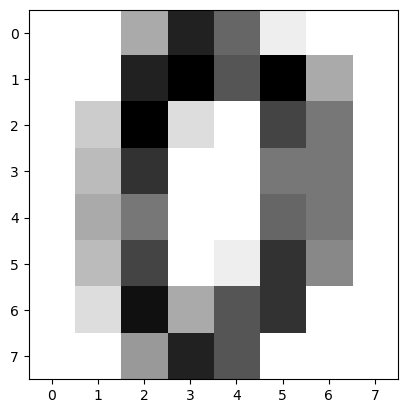

In [8]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

## The second digit

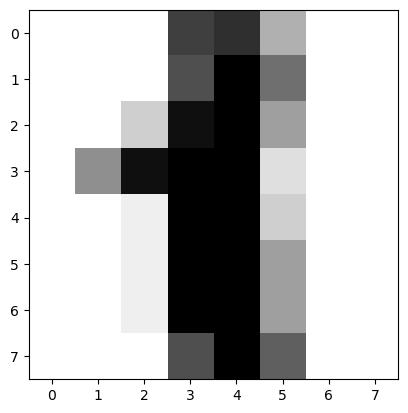

In [9]:
plt.imshow(digits.images[1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [14]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [2]:
df = pd.read_csv("../data/toy_data.csv", index_col=0)

In [3]:
df.head()

,x,y,type
0,-0.804458,0.320932,yes
1,-0.025483,0.644324,yes
2,-0.300797,0.389475,yes
3,-0.107437,-0.479983,yes
4,0.595036,-0.464668,yes


In [4]:
feat_names = df.columns[:-1]
class_names = df['type'].unique()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[feat_names],
                                                    df['type'],
                                                    test_size=0.25,
                                                    random_state=42)

In [12]:
mlp = MLPClassifier(
    hidden_layer_sizes=(40,),
    max_iter=8,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=42,
    learning_rate_init=0.2,
)

# this example won't converge because of resource usage constraints on
# our Continuous Integration infrastructure, so we catch the warning and
# ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

Iteration 1, loss = 0.64229143
Iteration 2, loss = 0.47705700
Iteration 3, loss = 0.37002174
Iteration 4, loss = 0.31440915
Iteration 5, loss = 0.29423282
Iteration 6, loss = 0.29010723
Iteration 7, loss = 0.29310628
Iteration 8, loss = 0.29651936


In [13]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.877333
Test set score: 0.904000
